## 自编码器实现

In [20]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
from tensorflow.examples.tutorials.mnist import input_data
# import data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [9]:
#初始化权重
def weight_variable(shape):
    data = tf.truncated_normal(stddev=0.1,shape=shape)
    return tf.Variable(data)

#初始化偏置单元
def bais_variable(shape):
    data = tf.constant(0.1,shape=shape)
    return tf.Variable(data)

def get_noise(shape,stddev=0.01):
    return tf.truncated_normal(shape=shape,stddev=stddev)

In [74]:
def show_image(fig,image,index):
    image = image.reshape(28,28)
    ax = fig.add_subplot(index)
    ax.imshow(image,cmap="gray")

In [10]:
#build model
class AutoEncoder:
    def __init__(self,input_n,hidden_n,sess):
        #初始化节点数
        self.input_n=input_n
        self.hidden_n=hidden_n
        self.sess=sess
        self.X = tf.placeholder(tf.float32,[None,input_n])
        self.W_input = weight_variable([input_n,hidden_n])
        self.b_input = bais_variable([hidden_n])
        self.W_output = weight_variable([hidden_n,input_n])
        self.b_output = bais_variable([input_n])
        #计算隐层
        self.hidden = tf.nn.softplus(tf.matmul(self.X+get_noise([input_n,]),self.W_input)+self.b_input)
        #计算重构层
        self.reconstruction = tf.matmul(self.hidden,self.W_output)+self.b_output
        #损失函数
        self.cost = tf.reduce_mean(tf.pow(self.reconstruction-self.X,2))
        #默认使用Adam
        self.optimazer = tf.train.AdamOptimizer()
        #训练步骤
        self.train_step = self.optimazer.minimize(self.cost)
        
        
    #在样本X上进行一次训练，并返回误差
    def partial_fit(self,X):
        c,_ = self.sess.run((self.cost,self.train_step),feed_dict={self.X:X})
        return c
    
    #返回在样本X上的总误差，不会触发训练操作
    def calc_total_cost(self,X):
        return self.sess.run(self.cost,feed_dict={self.X:X})
    
    def transform(self,X):
        return self.sess.run(self.hidden,feed_dict={self.X:X})
    
    def generate(self,hidden=None):
        if hidden is None:
            hidden = np.random.normal(size=self.b_input)
        return self.sess.run(self.reconstruction,feed_dict={self.hidden:hidden})

In [69]:
sess = tf.InteractiveSession()
encoder = AutoEncoder(784,20,sess)
tf.global_variables_initializer().run()
batch_size=128
display_step = 50
batchs = int(mnist.train.images.size/batch_size)
for epoch in range(3000):
    X,__ = mnist.train.next_batch(batch_size)
    cost = encoder.partial_fit(X)
    if epoch % display_step == 0:
        print('Epoch:','%04d' % (epoch +1 ) ,"cost=","%.9f" % cost)
print("totalCost=",encoder.calc_total_cost(mnist.test.images))

Epoch: 0001 cost= 0.246817231
Epoch: 0051 cost= 0.083852701
Epoch: 0101 cost= 0.072217360
Epoch: 0151 cost= 0.065666817
Epoch: 0201 cost= 0.062352654
Epoch: 0251 cost= 0.053403556
Epoch: 0301 cost= 0.049274240
Epoch: 0351 cost= 0.042051412
Epoch: 0401 cost= 0.041318268
Epoch: 0451 cost= 0.040301375
Epoch: 0501 cost= 0.037962981
Epoch: 0551 cost= 0.034838852
Epoch: 0601 cost= 0.034524839
Epoch: 0651 cost= 0.032229248
Epoch: 0701 cost= 0.032432180
Epoch: 0751 cost= 0.030381735
Epoch: 0801 cost= 0.030174272
Epoch: 0851 cost= 0.028710466
Epoch: 0901 cost= 0.027621768
Epoch: 0951 cost= 0.028546879
Epoch: 1001 cost= 0.027734078
Epoch: 1051 cost= 0.027568473
Epoch: 1101 cost= 0.026489574
Epoch: 1151 cost= 0.027923020
Epoch: 1201 cost= 0.025787894
Epoch: 1251 cost= 0.026330329
Epoch: 1301 cost= 0.026082773
Epoch: 1351 cost= 0.026926041
Epoch: 1401 cost= 0.027136214
Epoch: 1451 cost= 0.026957618
Epoch: 1501 cost= 0.026159158
Epoch: 1551 cost= 0.027184390
Epoch: 1601 cost= 0.025021514
Epoch: 165

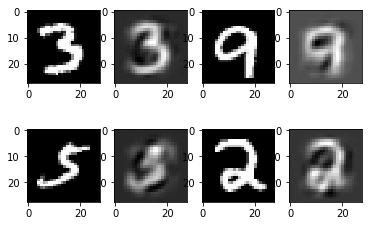

In [75]:
te = mnist.test.images[500:505]
re = encoder.generate(encoder.transform(te))
fig = plt.figure()
show_image(fig,te[0],241)
show_image(fig,re[0],242)
show_image(fig,te[1],243)
show_image(fig,re[1],244)
show_image(fig,te[2],245)
show_image(fig,re[2],246)
show_image(fig,te[3],247)
show_image(fig,re[3],248)
plt.show()